# Modificacion dataset

In [58]:
import os

# Files from folder

In [59]:
datasetPath = "../data/NU_Dataset_1"

facePath = f"{datasetPath}/Images/Face/"
depthPath = f"{datasetPath}/Images/Depth/"

print(os.listdir(datasetPath))

imageFiles = []

for root, dirs, files in os.walk(datasetPath):
    for file in files:
        if file.endswith('_4.jpg'):
            imageFiles.append(os.path.join(root,file))

print(imageFiles)

['TD_RGB_A_Set4.zip', 'TD_RGB_A_Set3.zip', 'TD_RGB_A_Set2.zip', 'TD_RGB_A_Set1.zip', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 'readme.txt', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', 'Images']
['../data/NU_Dataset_1/1/TD_RGB_A_1_4.jpg', '../data/NU_Dataset_1/1/TD_RGB_A_2_4.jpg', '../data/NU_Dataset_1/1/TD_RGB_A_3_4.jpg', '../data/NU_Dataset_1/1/TD_RGB_A_4_4.jpg', '../data/NU_Dataset_1/2/TD_RGB_A_1_

# Create a depth map with depth estimation

In [ ]:
from transformers import DPTImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large").to(device)

for imagePath in imageFiles:
    print(imagePath)
    
    image = Image.open(imagePath)
    image.save(f"{facePath}"+f"{os.path.basename(os.path.dirname(imagePath))}{os.path.basename(imagePath)}")

    # prepare image for the model
    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth

    # interpolate to original size
    prediction = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1),
        size=image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    # visualize the prediction
    output = prediction.squeeze().cpu().numpy()
    formatted = (output * 255 / np.max(output)).astype("uint8")
    depth = Image.fromarray(formatted)
    
    depth.save(f"{depthPath}"+f"{os.path.basename(os.path.dirname(imagePath))}{os.path.basename(imagePath)}")

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


../data/NU_Dataset_1/1/TD_RGB_A_1_4.jpg
../data/NU_Dataset_1/1/TD_RGB_A_2_4.jpg
../data/NU_Dataset_1/1/TD_RGB_A_3_4.jpg
../data/NU_Dataset_1/1/TD_RGB_A_4_4.jpg
../data/NU_Dataset_1/2/TD_RGB_A_1_4.jpg
../data/NU_Dataset_1/2/TD_RGB_A_2_4.jpg
../data/NU_Dataset_1/2/TD_RGB_A_3_4.jpg
../data/NU_Dataset_1/2/TD_RGB_A_4_4.jpg
../data/NU_Dataset_1/3/TD_RGB_A_1_4.jpg
../data/NU_Dataset_1/3/TD_RGB_A_2_4.jpg
../data/NU_Dataset_1/3/TD_RGB_A_3_4.jpg
../data/NU_Dataset_1/3/TD_RGB_A_4_4.jpg
../data/NU_Dataset_1/4/TD_RGB_A_1_4.jpg
../data/NU_Dataset_1/4/TD_RGB_A_2_4.jpg
../data/NU_Dataset_1/4/TD_RGB_A_3_4.jpg
../data/NU_Dataset_1/4/TD_RGB_A_4_4.jpg
../data/NU_Dataset_1/5/TD_RGB_A_1_4.jpg
../data/NU_Dataset_1/5/TD_RGB_A_2_4.jpg
../data/NU_Dataset_1/5/TD_RGB_A_3_4.jpg
../data/NU_Dataset_1/5/TD_RGB_A_4_4.jpg
../data/NU_Dataset_1/6/TD_RGB_A_1_4.jpg
../data/NU_Dataset_1/6/TD_RGB_A_2_4.jpg
../data/NU_Dataset_1/6/TD_RGB_A_3_4.jpg
../data/NU_Dataset_1/6/TD_RGB_A_4_4.jpg
../data/NU_Dataset_1/7/TD_RGB_A_1_4.jpg


../data/NU_Dataset_1/Images/Face/113TD_RGB_A_3_4.jpg


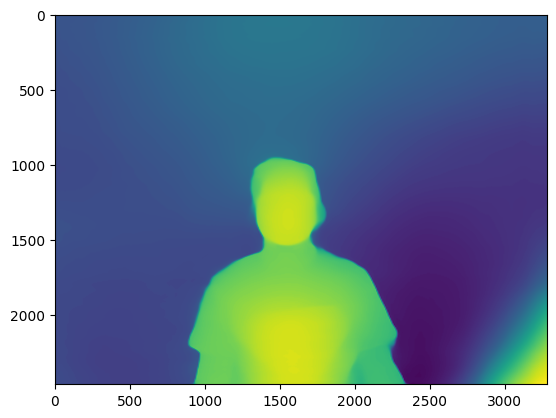

In [61]:
print(
    f"{facePath}"
    + f"{os.path.basename(os.path.dirname(imagePath))}{os.path.basename(imagePath)}"
)

import matplotlib.pyplot as plt

plt.imshow(depth)

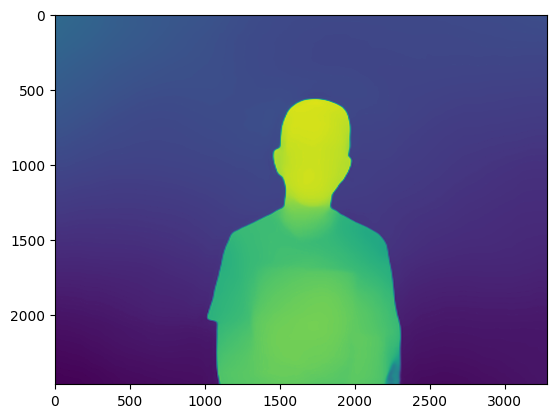

In [ ]:
#facePath = f"{datasetPath}/Images/Face/"
#depthPath = f"{datasetPath}/Images/Depth/"
#
#imagePath = f"{depthPath}/1TD_RGB_A_2_4.jpg"
#
#image = Image.open(imagePath)
#image = image.rotate(180)
#plt.imshow(image)
#
#image.save(imagePath)